In [1]:
import pandas as pd
import numpy as np
from config import *
%matplotlib inline

In [7]:
# COMBINE DATA
import os

def glue_files(data_folder):
    
    all_files = os.listdir(os.path.expanduser(data_folder))

    df_glued = None
    for file in all_files:
        if '.csv' not in file or 'all' in file:
            continue

        filepath = os.path.join(data_folder, file)
        if df_glued is None:
            df_glued = pd.read_csv(filepath)
        else:
            df_glued = df_glued.append(pd.read_csv(filepath))
    
    return df_glued

In [8]:


df = glue_files(RAW_DATA_FOLDER)

In [9]:
# CHECK MISSING DATA

# return rows with NaN lines
df[df.isnull().any(axis=1)]

# test 
#df[df.replace('POZ', np.NAN).isnull().any(axis=1)]

,check_date,from,to,flight_date,departure_time,arrival_time,flight_number,price


In [10]:
# CONVERT TO SINGLE CURRENCY

def adjust_price(row):
    return row['price'] * city_to_rate(row['from'])

def city_to_rate(city):
    return CURRENCY_TO_GBP[CITY_TO_CURRENCY[city]]

def add_gbp_price(df):
    df['price_gbp'] = df.apply(adjust_price, axis=1)
    return df

df = add_gbp_price(df)

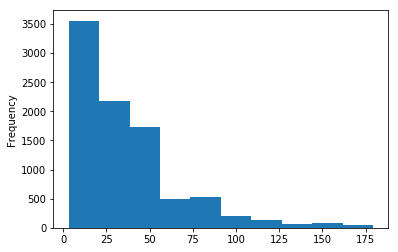

In [11]:
df['price_gbp'].plot.hist()

In [12]:
# CONVERT TIMESTAMP
df['timestamp_ms'] = df['check_date']
df['check_date'] = pd.to_datetime(df['timestamp_ms'], unit='ms')

In [13]:
df = df.sort_values('check_date')

In [14]:
df.to_csv(PROCESSED_DATA_FOLDER + PROCESSED_FILE)